# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import load_dataset
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
y, X = patsy.dmatrices('tip ~ smoker + net_bill + 1', tips)
modelo = sm.OLS(y,X).fit()
tips['res'] = modelo.resid

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           4.56e-22
Time:                        10:50:19   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Variavel sex retirada por não ter impacto estatisco.

Após a retirada foi verificado que a variavel time 'diner' também não tinha signicancia no modelo.


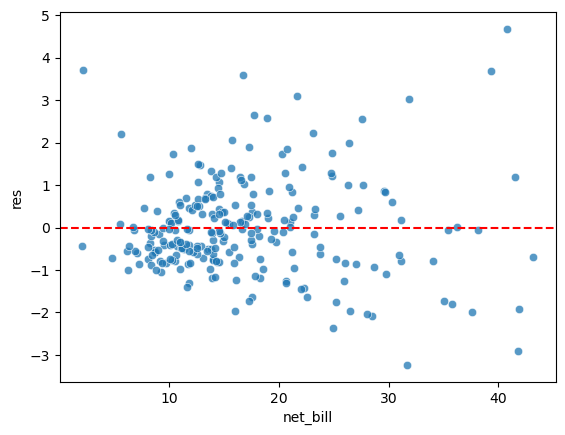

In [4]:
sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [160]:
y, X = patsy.dmatrices('tip ~ np.log(net_bill+.1) + 1', tips)
modelo = sm.OLS(y,X).fit()
tips['res'] = modelo.resid

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     101.6
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           3.53e-20
Time:                        14:16:22   Log-Likelihood:                -382.18
No. Observations:                 244   AIC:                             768.4
Df Residuals:                     242   BIC:                             775.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.3160      0.434     -3.029      0.003      -2.172      -0.460
np.log(net_bill + .1)     1.5867      0.157     10.080      0.000       1.277       1.897
==============================================================================
Omnibus:                       73.292   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.595
Skew:                           1.294   Prob(JB):                     5.62e-48
Kurtosis:                       6.835   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

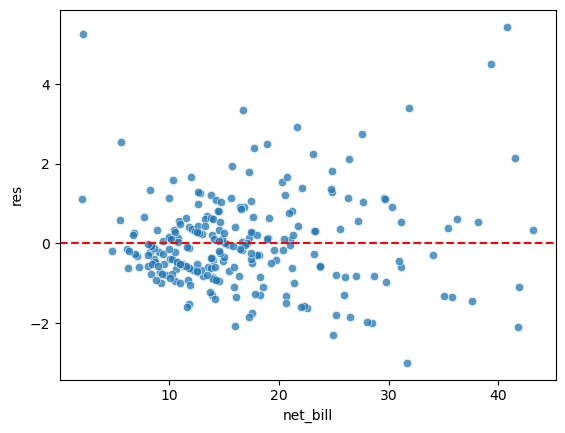

In [6]:
sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [7]:
y, X = patsy.dmatrices('tip ~ net_bill +np.power(net_bill,2) + 1', tips)
modelo = sm.OLS(y,X).fit()
tips['res'] = modelo.resid

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           4.96e-22
Time:                        10:50:19   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

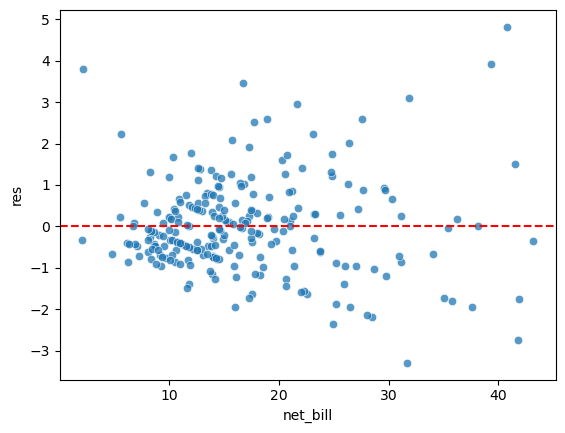

In [8]:
sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

O modelo com melhor resultado é o com a variavel net_bill como log. 

Modelo como polinômio:
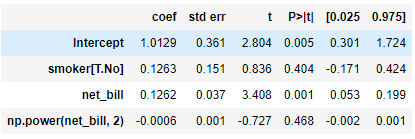

Modelo como log:
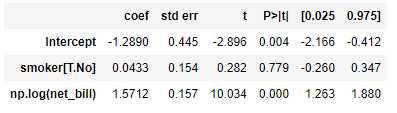

Além disso também retirei a variavel smoker.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [9]:
y, X = patsy.dmatrices('tip_pct ~ time + smoker + net_bill', tips)
modelo = sm.OLS(y,X).fit()
tips['res'] = modelo.resid

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     9.544
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           5.60e-06
Time:                        10:50:19   Log-Likelihood:                 110.07
No. Observations:                 244   AIC:                            -212.1
Df Residuals:                     240   BIC:                            -198.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3173      0.030     10.474      0.000       0.258       0.377
time[T.Dinner]     0.0235      0.023      1.040      0.299      -0.021       0.068
smoker[T.No]      -0.0350      0.021     -1.698      0.091      -0.076       0.006
net_bill          -0.0066      0.001     -5.197      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      462.732   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           220135.338
Skew:                          10.824   Prob(JB):                         0.00
Kurtosis:                     148.547   Cond. No.                         64.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

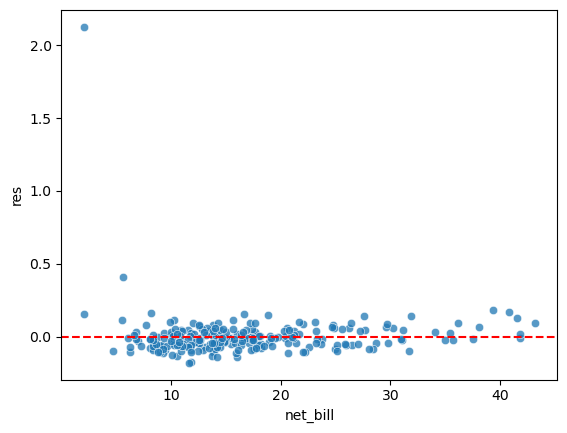

In [10]:
sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

Modelo completo com todas as variaveis:
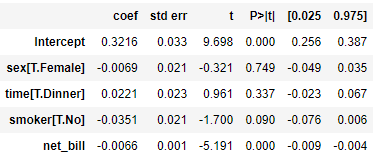

Após a retirada da variavel sex:
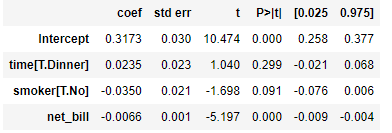

In [11]:
y, X = patsy.dmatrices('tip_pct ~ smoker + net_bill +np.power(net_bill,2) + 1', tips)
modelo = sm.OLS(y,X).fit()
tips['res'] = modelo.resid

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     15.66
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           2.46e-09
Time:                        10:50:19   Log-Likelihood:                 118.13
No. Observations:                 244   AIC:                            -228.3
Df Residuals:                     240   BIC:                            -214.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.4980      0.048     10.401      0.000       0.404       0.592
smoker[T.No]             -0.0265      0.020     -1.325      0.187      -0.066       0.013
net_bill                 -0.0263      0.005     -5.354      0.000      -0.036      -0.017
np.power(net_bill, 2)     0.0005      0.000      4.190      0.000       0.000       0.001
==============================================================================
Omnibus:                      445.116   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           181073.439
Skew:                          10.029   Prob(JB):                         0.00
Kurtosis:                     134.940   Cond. No.                     2.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

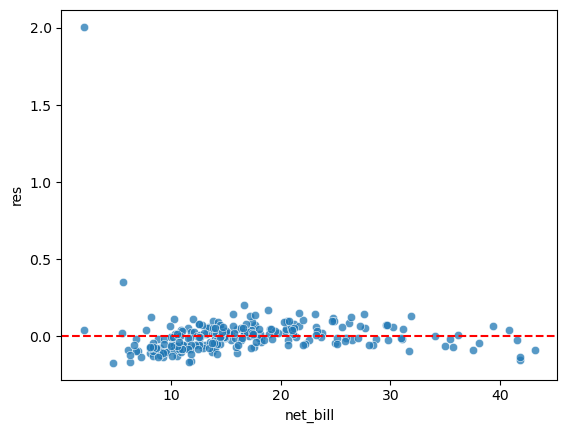

In [12]:
sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [161]:
y, X = patsy.dmatrices('tip_pct ~ smoker + net_bill +np.log(net_bill+.1) + 1', tips)
modelo = sm.OLS(y,X).fit()
tips['res'] = modelo.resid
tips['pred'] = modelo.fittedvalues

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     39.47
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           9.00e-21
Time:                        14:17:08   Log-Likelihood:                 145.25
No. Observations:                 244   AIC:                            -282.5
Df Residuals:                     240   BIC:                            -268.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.2107      0.100     12.083      0.000       1.013       1.408
smoker[T.No]             -0.0116      0.018     -0.645      0.519      -0.047       0.024
net_bill                  0.0218      0.003      6.614      0.000       0.015       0.028
np.log(net_bill + .1)    -0.5029      0.056     -9.037      0.000      -0.613      -0.393
==============================================================================
Omnibus:                      360.580   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68544.299
Skew:                           6.797   Prob(JB):                         0.00
Kurtosis:                      83.977   Cond. No.                         249.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

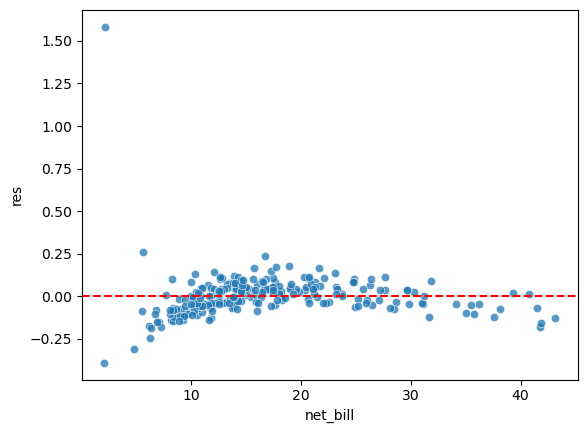

In [14]:
sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

Do modelo final deste item, calcule o  𝑅2
  na escala de tip (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação

In [15]:
r = tips[['pred', 'tip']].corr().iloc[0,1]
r**2

0.09143102400692907

In [162]:
y, X = patsy.dmatrices('tip ~ smoker + net_bill', tips)
modelo = sm.OLS(y,X).fit()
tips['pred'] = modelo.fittedvalues
r = tips[['pred', 'tip']].corr().iloc[0,1]
r**2

0.3348913546772816

O novo modelo apresentou um R² melhor de 0,334.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [179]:
renda = pd.read_csv('previsao_de_renda.csv')
renda = renda.drop('Unnamed: 0', axis=1)
renda = renda.drop('index', axis=1)
renda=renda.dropna()
renda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12466 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               12466 non-null  object 
 1   sexo                   12466 non-null  object 
 2   posse_de_veiculo       12466 non-null  bool   
 3   posse_de_imovel        12466 non-null  bool   
 4   qtd_filhos             12466 non-null  int64  
 5   tipo_renda             12466 non-null  object 
 6   educacao               12466 non-null  object 
 7   estado_civil           12466 non-null  object 
 8   tipo_residencia        12466 non-null  object 
 9   idade                  12466 non-null  int64  
 10  tempo_emprego          12466 non-null  float64
 11  qt_pessoas_residencia  12466 non-null  float64
 12  mau                    12466 non-null  bool   
 13  renda                  12466 non-null  float64
dtypes: bool(3), float64(3), int64(2), object(6)
memory usa

In [187]:
X = renda.drop(columns = ['renda']).copy()
X = pd.get_dummies(X, drop_first = True)
y =  renda.loc[:,'renda']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:56:02   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

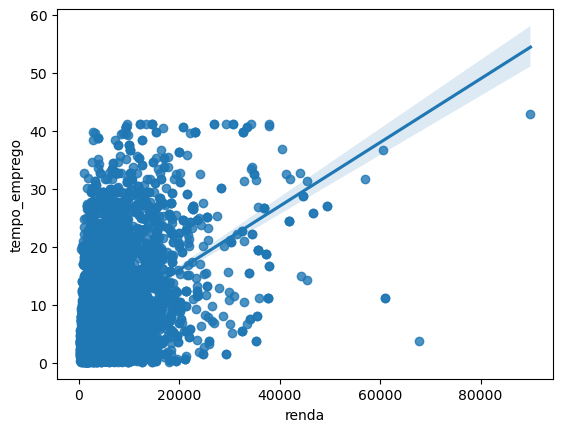

In [193]:
reg_renda = smf.ols('renda ~ tempo_emprego', data = renda).fit()
renda['res'] = reg_renda.resid

sns.regplot(x = 'renda', y = 'tempo_emprego', data = renda)
reg_renda.summary()

<Axes: xlabel='renda', ylabel='res'>

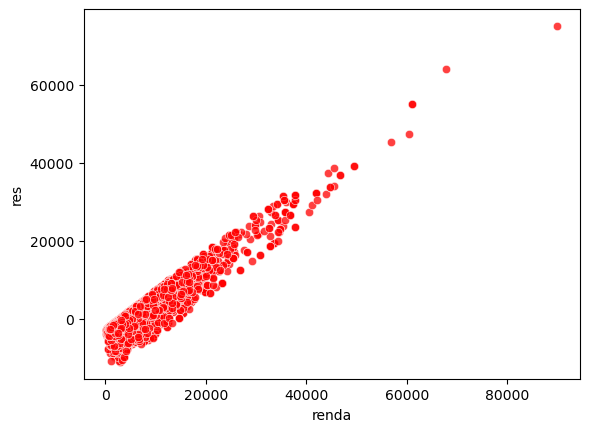

In [194]:
sns.scatterplot(x = 'renda', y = 'res', data = renda, alpha = .75, color='r')

Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
Os residuos aumentam conforme a renda aumenta, e há um há uma dispersão do tempo de emprego em formado cone quanto maior a renda. Devemos corrigir a linearidade do modelo para que de fato fique linear. Tranformando as variaveis preditoras.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(renda + .1)   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     726.9
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:39:05   Log-Likelihood:                -13333.
No. Observations:               12466   AIC:                         2.668e+04
Df Residuals:                   12460   BIC:                         2.672e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.3536      0.032    226.548      0.000       7.290       7.417
posse_de_imovel[T.True]     0.1007      0.013      7.552      0.000       0.075       0.127
sexo[T.M]                   0.4729      0.013     35.286      0.000       0.447       0.499
tempo_emprego               0.0478      0.001     48.220      0.000       0.046       0.050
idade                       0.0046      0.001      6.187      0.000       0.003       0.006
qtd_filhos                  0.0137      0.008      1.669      0.095      -0.002       0.030
==============================================================================
Omnibus:                        1.371   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.504   Jarque-Bera (JB):                1.349
Skew:                           0.011   Prob(JB):                        0.509
Kurtosis:                       3.046   Cond. No.                         222.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

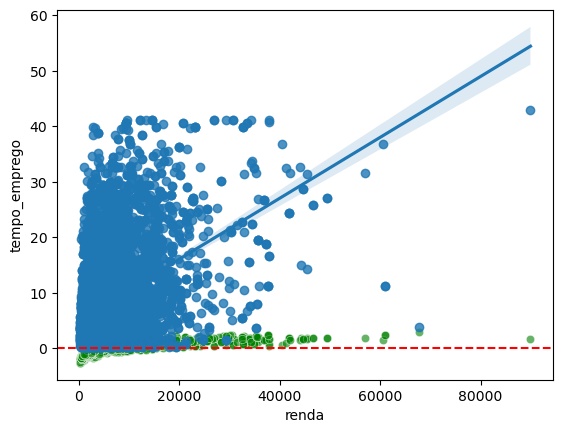

In [238]:
#Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) 
#de acordo com as demais variáveis.
y, X = patsy.dmatrices('np.log(renda+.1) ~ tempo_emprego+ posse_de_imovel +idade + qtd_filhos+ sexo', renda)
modelo_renda = sm.OLS(y,X).fit()
renda['res'] = modelo_renda.resid
        
sns.scatterplot(x = 'renda', y = 'res', data = renda, alpha=0.60, color='g')
sns.regplot(x = 'renda', y = 'tempo_emprego', data = renda)
plt.axhline(y=0, color='r', linestyle='--')
modelo_renda.summary()

Modelo utilizando todas as variaveis:
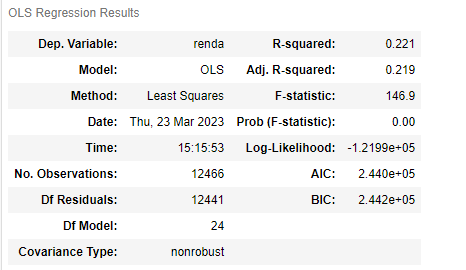
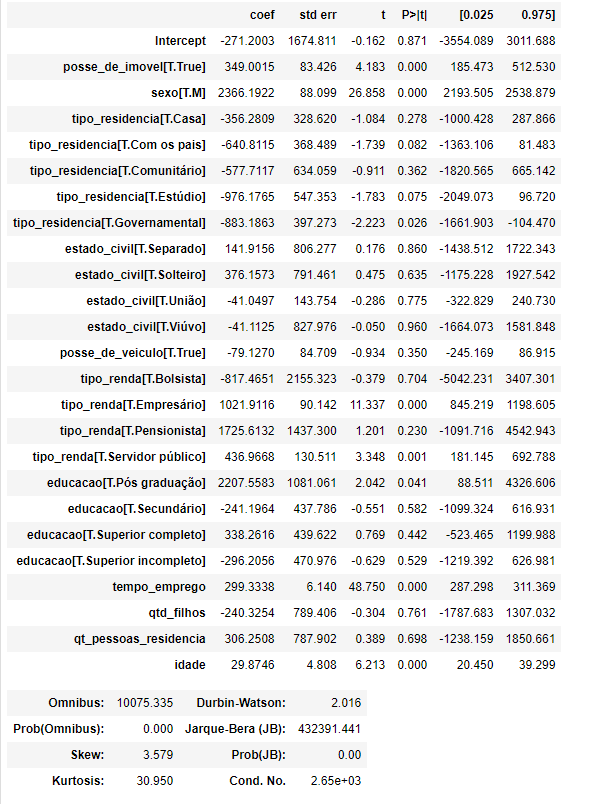

Após a realização do ajuste para log em renda, houve melhora no valor de R² para 0.226 o melhor encontrado em todos os modelos.
O gráfico de residuo apresernta o mesmo comportamento dos modelos anteriores, concentrado na linha 0 de Y (tempo de emprego)